# spanish texts

## text corpus

In [1]:
import pandas as pd 

In [2]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [3]:
corpus = list(corpus['texts'])

In [4]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [5]:
def tokenize(s):
    return s.split(' ')

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
!pip install -U pip setuptools wheel

In [8]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [9]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 6.1 kB/s  eta 0:00:01     |███████████████████▍            | 248.8 MB 75.9 MB/s eta 0:00:03
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [10]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [11]:
import re

def repl(match):
    data = {"á": "a", "é": "e", "í": "i","ó":"o","ú":"u"}
    return data.get(match.group(0))

In [12]:
from nltk.corpus import stopwords

def clean(sentence):
    sentence = re.sub(u'[^a-zA-Z0-9: ]', repl, sentence.encode().decode('utf-8'))
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if token.pos_=='NOUN']
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in stopwords.words('spanish')]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[w for w in sentence if not w.isdigit()]
    return sentence

In [13]:
clean('El curso está,, en general; bien constituido ')

['curso', 'general']

## basic statistics: types and tokens

In [14]:
#clean_corpus_all = [clean(sentence) for sentence in corpus]
#index_sentences = dict(zip(range(len(clean_corpus_all),clean_corpus_all)))
clean_corpus = []
CORPUS = []
for i in range(len(corpus)):
    C = clean(corpus[i])
    if len(C)>1:
        clean_corpus+=[C]
        CORPUS+=[corpus[i]]

In [15]:
clean_corpus[:5]

[['curso', 'general'],
 ['orden', 'contenido'],
 ['acuerdo', 'contenido', 'clase', 'bibliografia'],
 ['dinamica', 'dia', 'prueba', 'practica'],
 ['mesa', 'practico', 'fin']]

In [16]:
from collections import Counter

In [17]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

872 279


## graphs!

In [18]:
import networkx as nx

In [19]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [20]:
graph_text = GoW()

In [21]:
graph_text.nodes()

NodeView(('curso', 'general', 'orden', 'contenido', 'acuerdo', 'clase', 'bibliografia', 'dinamica', 'dia', 'prueba', 'practica', 'mesa', 'practico', 'fin', 'numero', 'alumno', 'aprendizaje', 'ayudantia', 'vez', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capitulo', 'informacion', 'fuente', 'profesor', 'cuanto', 'ayuda', 'teorica', 'pelvi', 'bloque', 'atencion', 'hilo', 'caso', 'instancia', 'forma', 'horario', 'yincana', 'imagenologia', 'sala', 'semestre', 'distribucion', 'torax', 'cuello', 'continuacion', 'relación', 'inervacion', 'irrigacion', 'desempeo', 'estudiante', 'disposicion', 'ambiente', 'alumnado', 'guia', 'autorregulacion', 'actividad', 'posibilidad', 'nota', 'control', 'revisión', 'ayudante', 'presencia', 'opcion', 'video', 'operación', 'disección', 'cadaver', 'organizacion', 'patologia', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'camara', 'puesto', 'trabajo', 'dibujo', 'maqueta', 'manera', 'temario', 'conocimiento', 'critica', 'respecto', '

In [22]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=3,font_color='k')
    plt.axis('off')
    plt.show()

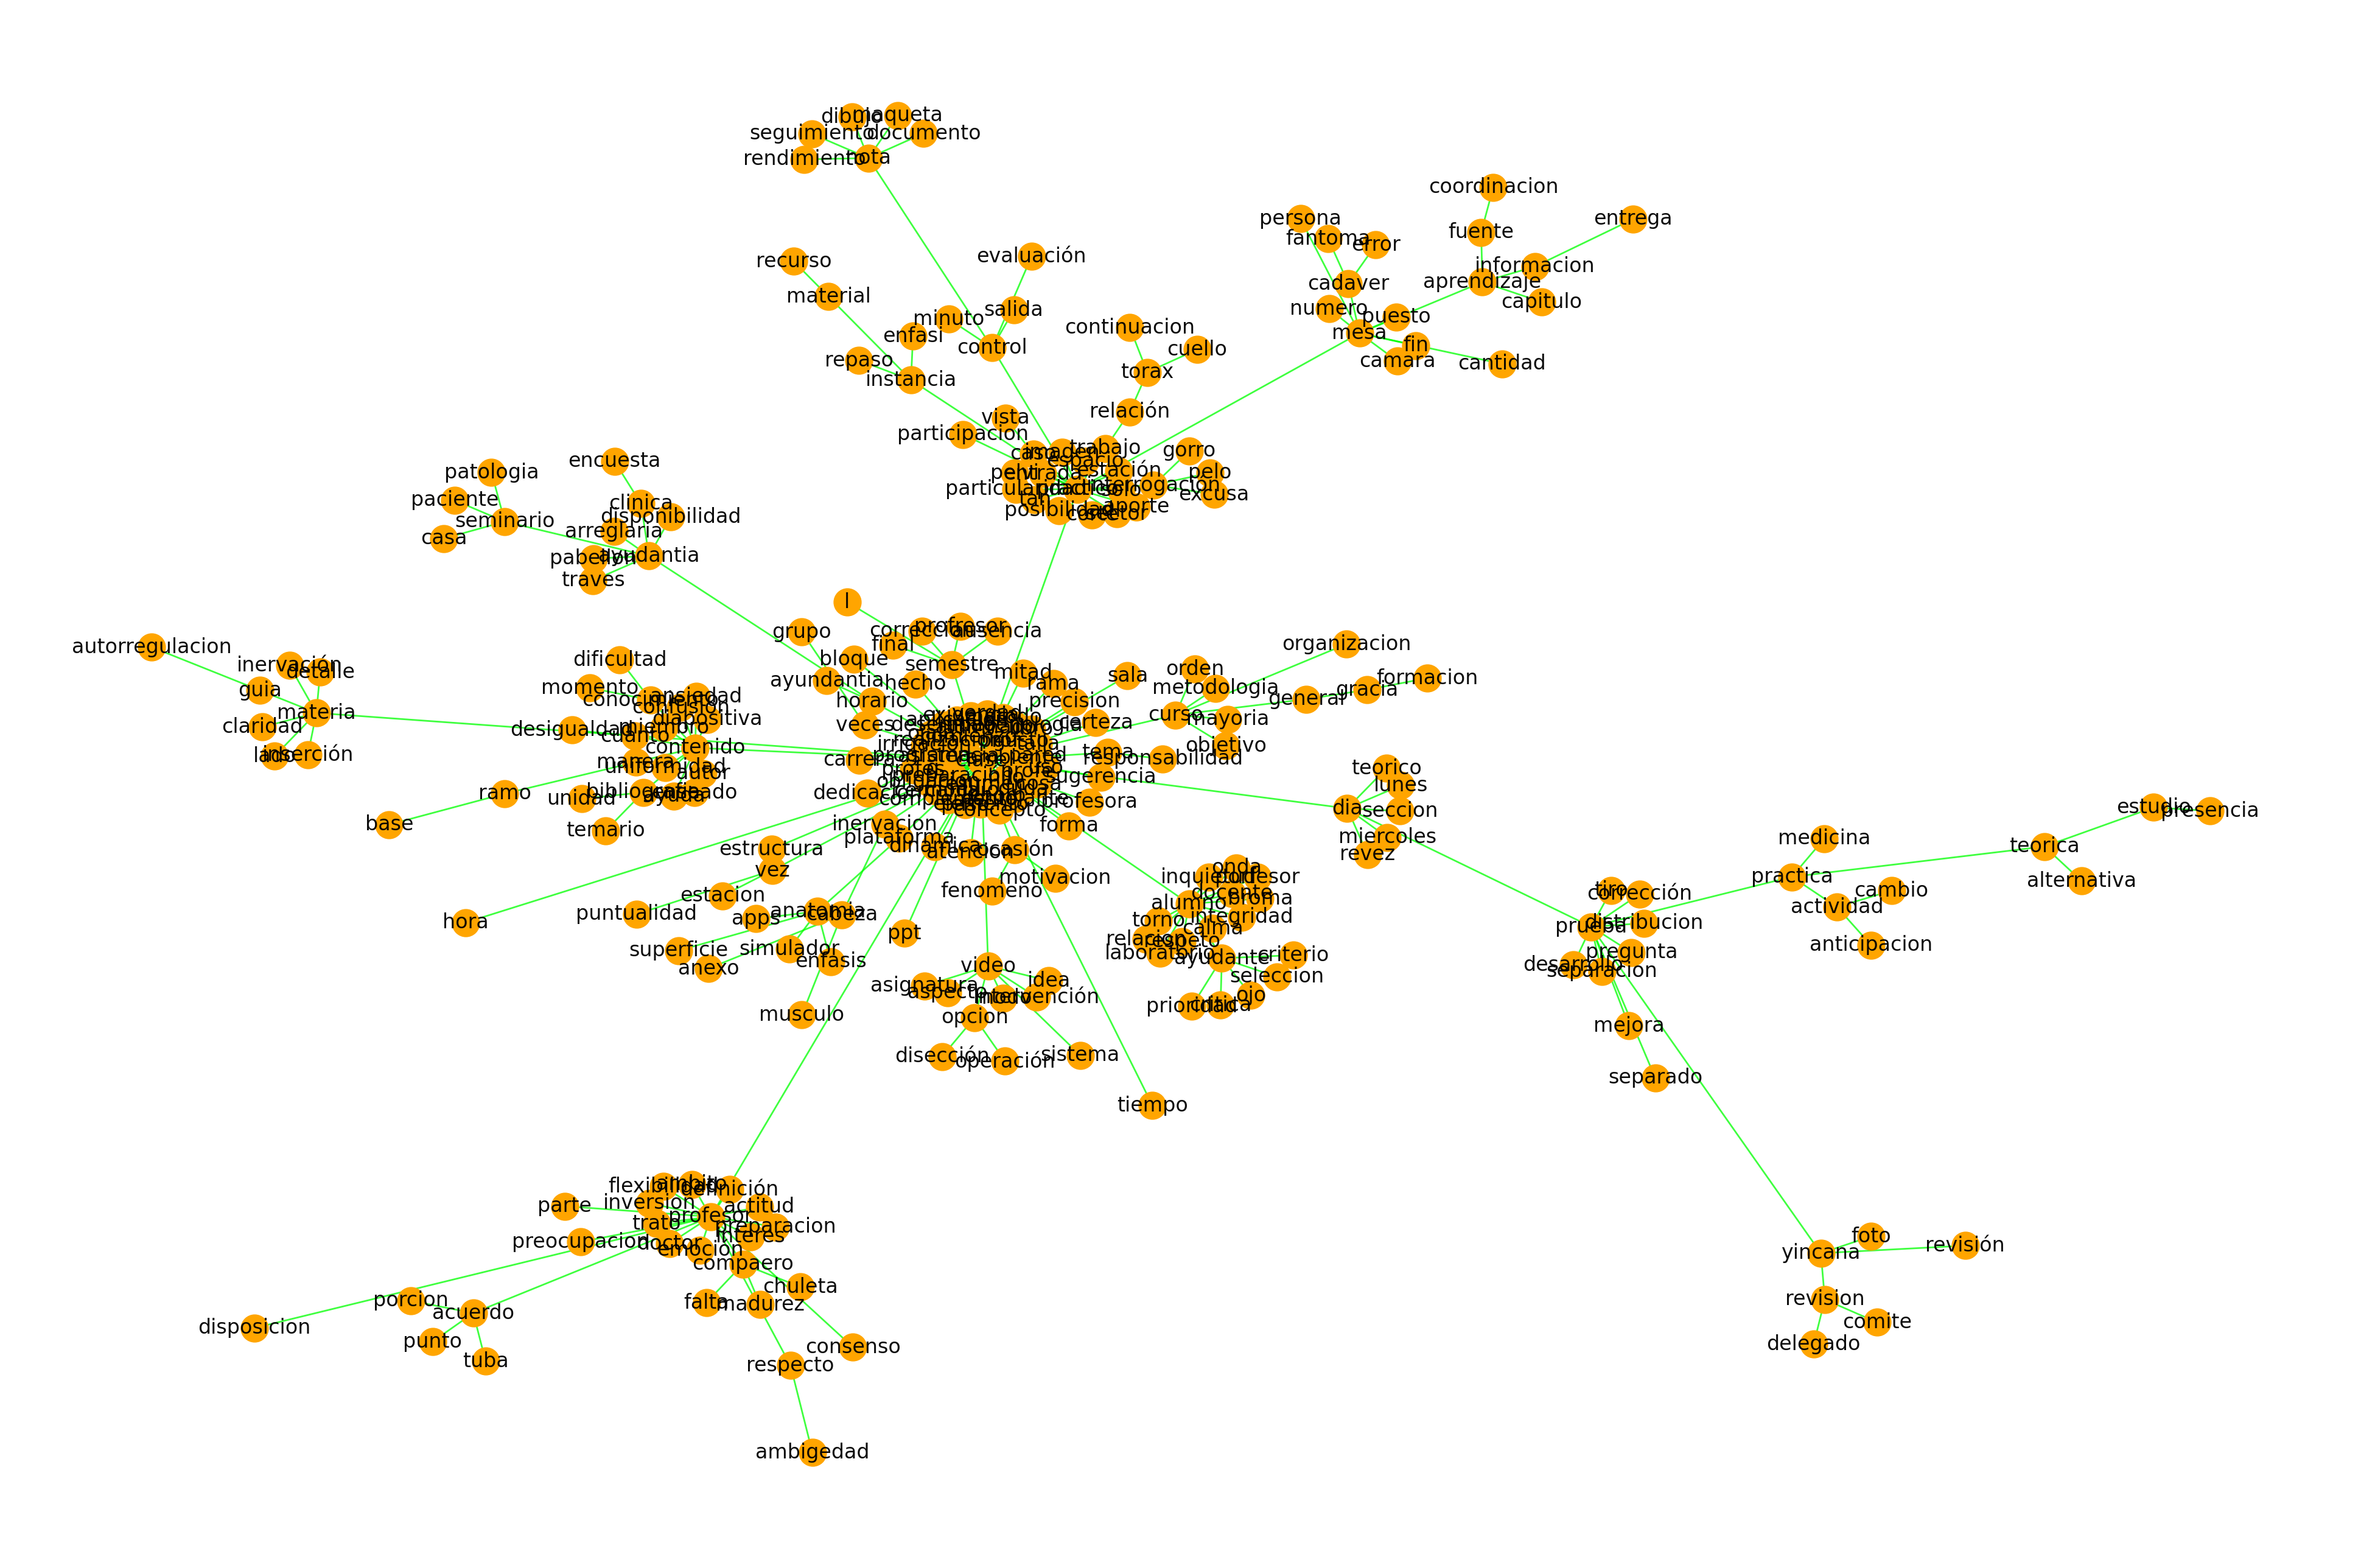

In [23]:
plot_graph(nx.maximum_spanning_tree(graph_text))

### main core

In [24]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
core_numbers = dict(nx.core_number(graph_text))
main_core = nx.k_core(graph_text)

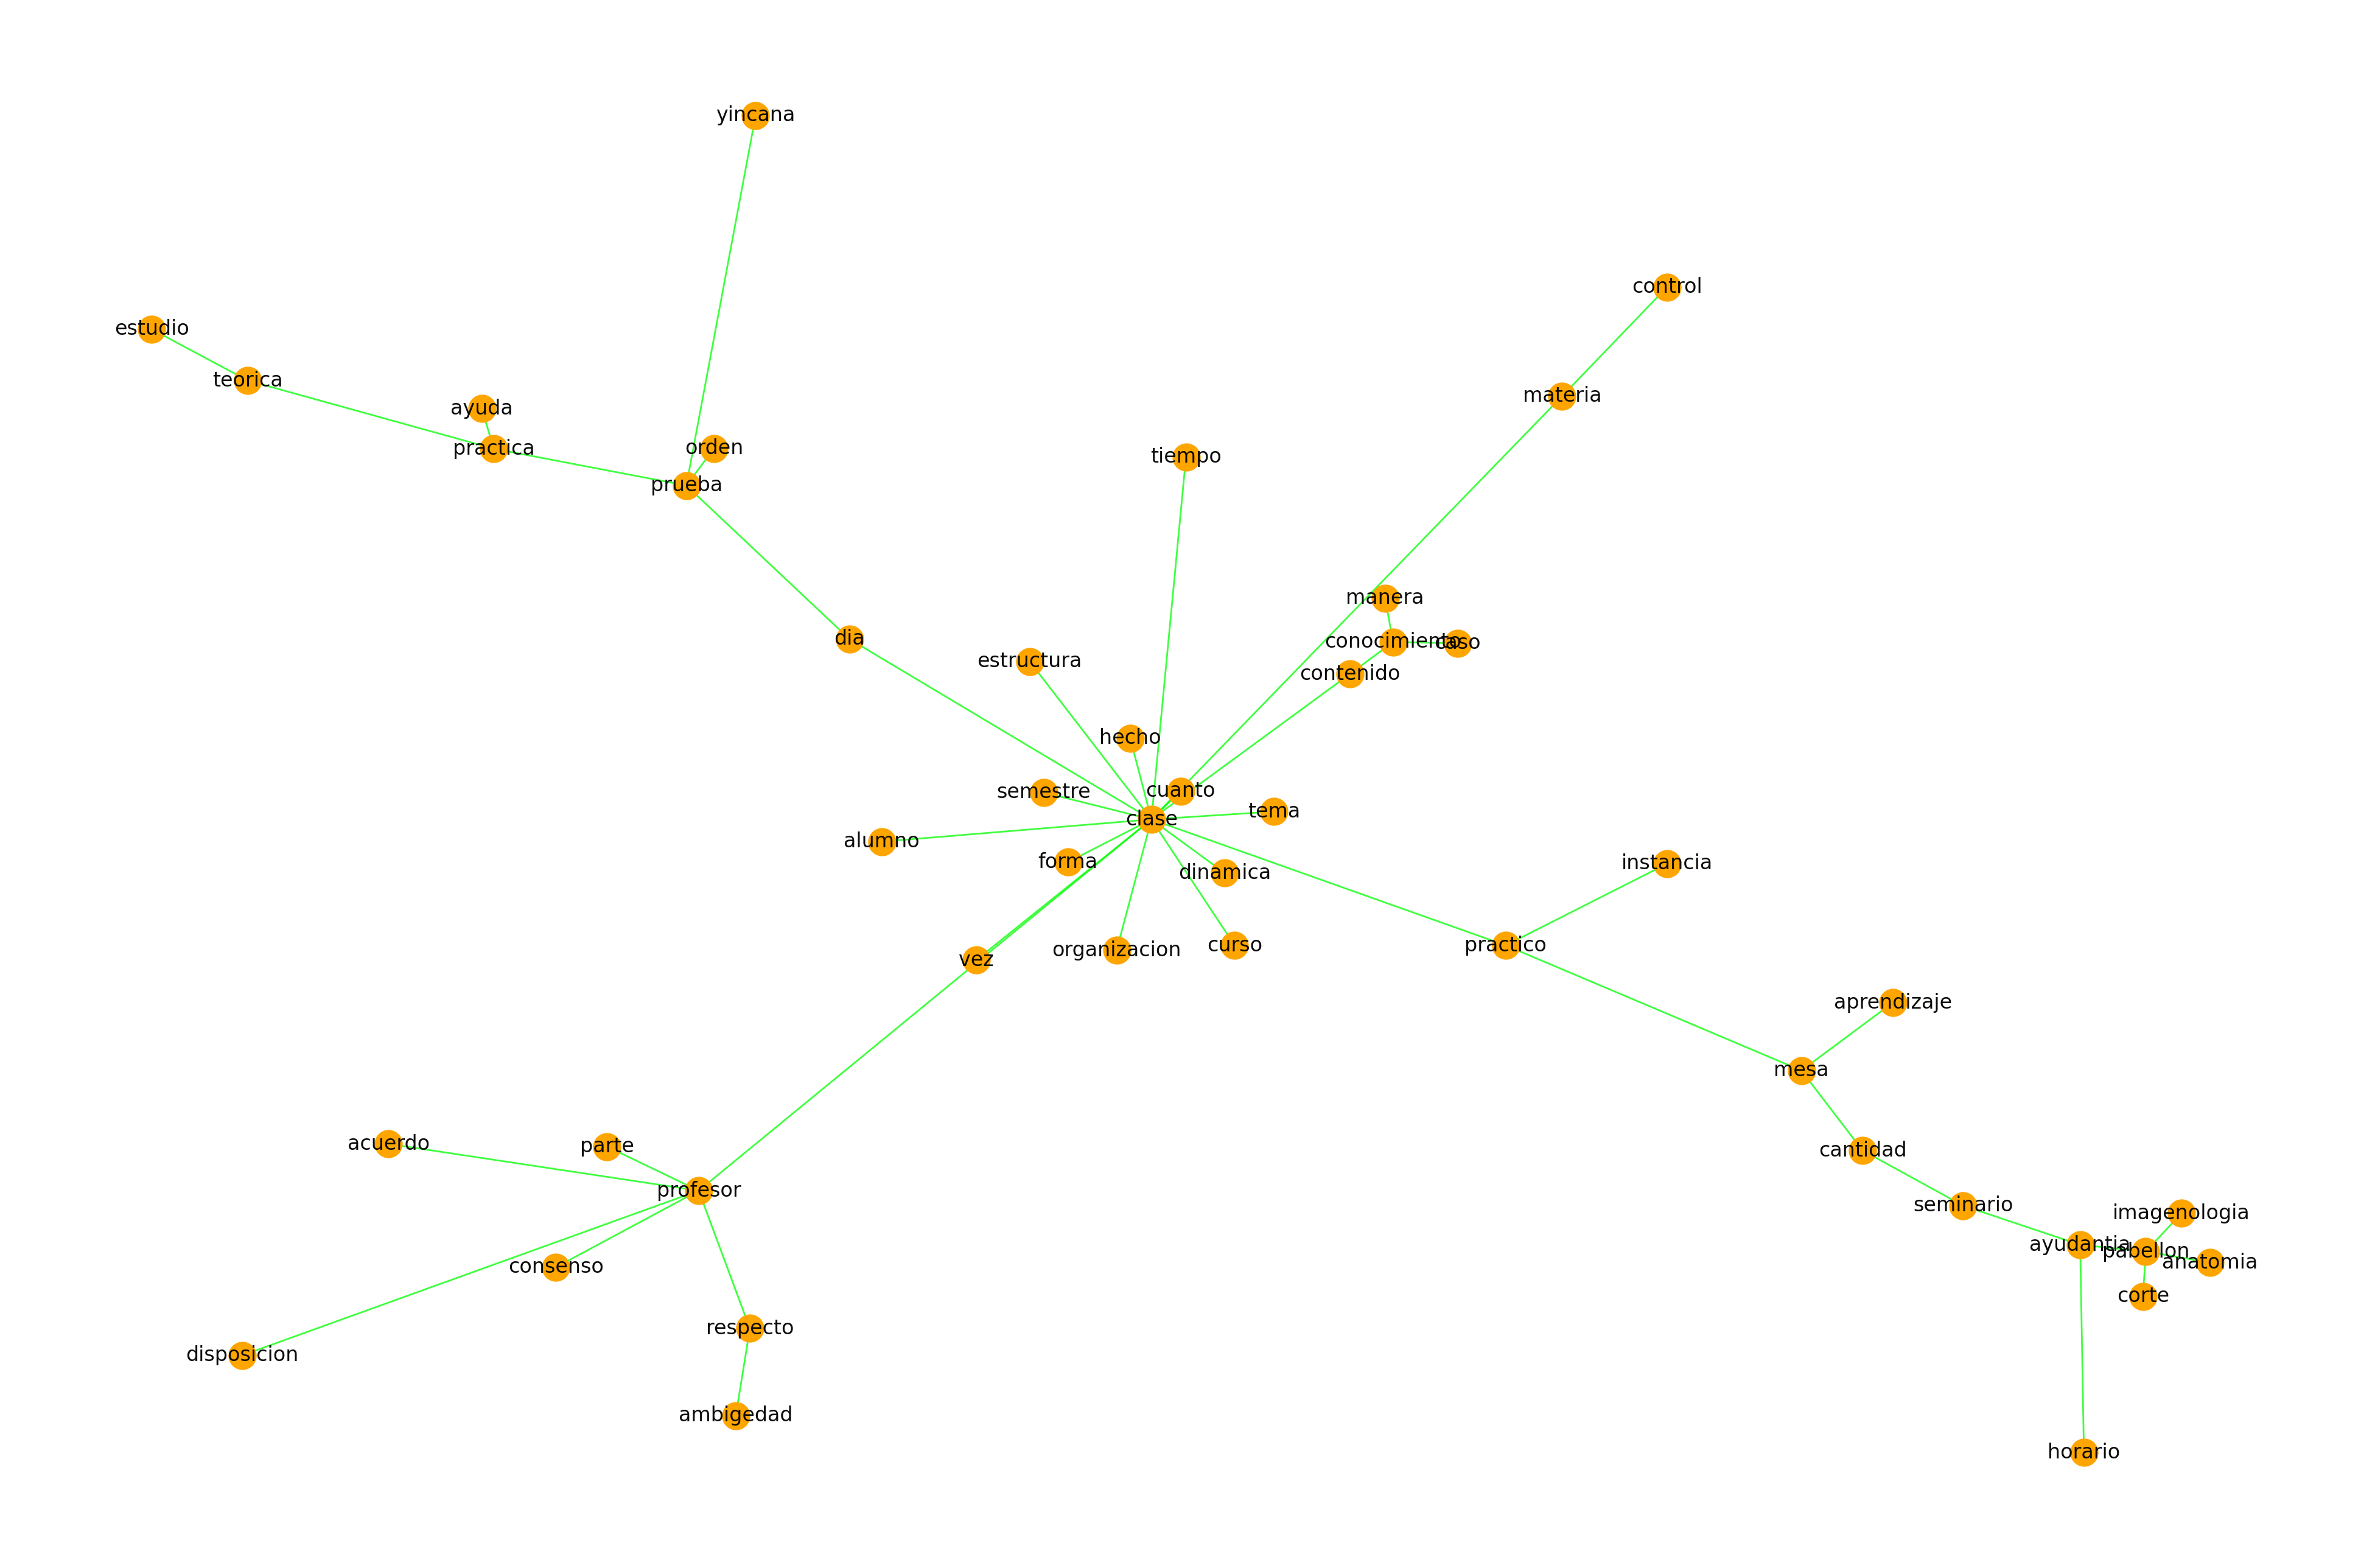

In [25]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [26]:
!pip install python-louvain

In [27]:
import community as community_louvain

In [28]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [29]:
len(set(partition.values()))

4

In [30]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [31]:
partition = dict(v)

In [32]:
partition

{3: ['acuerdo',
  'ambigedad',
  'consenso',
  'contenido',
  'cuanto',
  'disposicion',
  'orden',
  'parte',
  'profesor',
  'respecto',
  'semestre'],
 1: ['alumno',
  'aprendizaje',
  'clase',
  'control',
  'curso',
  'estructura',
  'materia',
  'mesa',
  'organizacion',
  'practico',
  'tema',
  'tiempo',
  'vez'],
 0: ['anatomia',
  'ayudantia',
  'cantidad',
  'caso',
  'conocimiento',
  'corte',
  'forma',
  'hecho',
  'horario',
  'imagenologia',
  'instancia',
  'manera',
  'pabellon',
  'seminario'],
 2: ['ayuda',
  'dia',
  'dinamica',
  'estudio',
  'practica',
  'prueba',
  'teorica',
  'yincana']}

In [33]:
def sum_cores(core_numbers,node,G):
    N = list(dict(G[node]).keys())
    C = 0
    for nodenode in N:
        C+=core_numbers[nodenode]
    return C

In [34]:
partition_core = {key:{word:sum_cores(core_numbers,word,graph_text) for word in partition[key]} for key in partition.keys()}

In [35]:
partition_core = {key:dict(sorted(partition_core[key].items(), key=lambda item: item[1],reverse=True)) for key in partition_core.keys()}

In [36]:
partition_core

{3: {'profesor': 248,
  'contenido': 138,
  'respecto': 132,
  'semestre': 86,
  'disposicion': 72,
  'parte': 70,
  'consenso': 64,
  'acuerdo': 63,
  'ambigedad': 52,
  'orden': 50,
  'cuanto': 46},
 1: {'clase': 383,
  'practico': 215,
  'materia': 196,
  'alumno': 135,
  'control': 125,
  'tiempo': 79,
  'vez': 78,
  'aprendizaje': 72,
  'mesa': 63,
  'tema': 55,
  'organizacion': 51,
  'curso': 49,
  'estructura': 45},
 0: {'instancia': 132,
  'anatomia': 98,
  'cantidad': 70,
  'ayudantia': 68,
  'corte': 66,
  'forma': 63,
  'imagenologia': 59,
  'seminario': 58,
  'manera': 56,
  'conocimiento': 53,
  'horario': 49,
  'pabellon': 47,
  'caso': 46,
  'hecho': 36},
 2: {'prueba': 113,
  'dia': 108,
  'practica': 100,
  'yincana': 94,
  'teorica': 64,
  'estudio': 58,
  'ayuda': 36,
  'dinamica': 36}}

## clustering!

In [37]:
cluster_sentences = {group:[] for group in partition.keys()}

In [38]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [39]:
import numpy as np

def similarity_core(D,L2):
    if len(list(set(D.keys()) & set(L2)))==0:
        return 0
    else:
        return sum([D[word] for word in L2 if word in D.keys()])

In [40]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity_core(partition_core[group],sentence)
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[CORPUS[clean_corpus.index(sentence)]]

In [41]:
cluster_sentences_label = {}
for key in cluster_sentences.keys():
    key_label = max(partition_core[key].items(), key=operator.itemgetter(1))[0]
    cluster_sentences_label[key_label]=cluster_sentences[key]

In [42]:
DF=pd.DataFrame.from_dict(cluster_sentences_label,orient='index').T

In [43]:
DF.to_csv('grupos.csv')

In [44]:
DF

,profesor,clase,instancia,prueba
0,El orden de los contenido,El curso está en general bien constituido,sigan con los seminarios hechos desde la casa,Que se mantenga la dinamica de separar por dia...
1,Debería haber un acuerdo previo entre los prof...,Que se pongan de acuerdo si se va a prorizar e...,Mas casos clinicos o instancias para desarroll...,Me gustaria que se hicieran mas ayudantías ant...
2,"Ver torax despues de cuello, para mantener una...",Que se agregue una mesa mas en los practicos a...,Ayudantia en horarios más comodos,ayuda mas si es la teórica primero ya que se a...
3,Me gustaría destacar la buena disposición que ...,disminuir el numero de alumnos por mesas,no siento que haya aprendido lo debido en cuan...,Que se pudieran mantener las solemnes teórica ...
4,Me gustaría que se mantuviera que nos proporci...,6 a 8 alumnos por mesa permitiendo un aprendiz...,Profundizar mas en los casos clinicos de semin...,Encuentro mejor hacer la yincana antes de la p...
...,...,...,...,...
130,None,Mantener la buena onda entre porfesores y alum...,None,None
131,None,Mantener lo completa que son las clases y lo c...,None,None
132,None,Agregaría ayudantías para las materias que fue...,None,None
133,None,Cambiaria los controles de los dias miercoles ...,None,None


## evaluation!

In [45]:
corpus_100 = pd.read_csv('Eval2.csv', delimiter = ";")

In [46]:
corpus_100.columns

Index(['Phrase', 'Examiner 2'], dtype='object')

In [47]:
groups = set(corpus_100['Examiner 2'])

In [48]:
groups

{'Evaluación',
 'Material',
 'Profesores',
 'Sentimiento',
 'actividades',
 'coordinacion',
 'sentimiento'}

In [49]:
dict_100 = dict(zip(corpus_100['Phrase'],corpus_100['Examiner 2']))

In [50]:
dict_100

{' 6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado': 'coordinacion',
 ' A veces los autores se contradicen en ciertos contenidos entre ellos y con los enseÃ±ados en clase, eso genera confusiÃ³n y ansiedad.': 'Material',
 ' actividades que nos dieron la posibilidad de subir las notas de controles': 'actividades',
 ' AgregarÃ\xada ayudantÃ\xadas para las materias que fueran mas difÃ\xadciles y mas complicadas. ': 'coordinacion',
 ' algunas veces mejorar la puntualidad': 'coordinacion',
 ' ArreglarÃ\xada  las evaluaciones (sobre todo los controles de imagenologÃ\xada)': 'Evaluación',
 ' Cabe destacar lo positivo de las instancias prÃ¡cticas ya que la mayorÃ\xada de las dudas se aclaran aquÃ\xad.': 'actividades',
 ' Cambiar o definir com mÃ¡s precisiÃ³n el libro del cual se deba estudiar y guiar para las solemnes.': 'Material',
 ' Cambiaria los controles de los dias miercoles en los que entraba materia pasada el lunes. ': 'Evaluación',
 ' Clases teÃ³ricas divididas, no 

## another version of graphs!

In [51]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW_parts(text_clean,n_parts,radius=4):
    list_graphs=[]
    L = range(len(text_clean))
    parts = np.array_split(L, n_parts)
    
    for part in parts:
        G=nx.Graph()
        for sentence in [text_clean[i] for i in part]:
            if len(sentence)>1:
                pairs=[]
                for r in list(range(1,radius+1)):
                    pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
                for pair in pairs:
                    if G.has_edge(pair[0],pair[1])==False:
                        G.add_edge(pair[0],pair[1],weight=1)
                    else:
                        x=G[pair[0]][pair[1]]['weight']
                        G[pair[0]][pair[1]]['weight']=x+1
                    
        #Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
        #G0 = G.subgraph(Gcc[0])
        list_graphs+=[G]
    
    return list_graphs

In [52]:
import random

repetitions = 10
graph_parts = [{} for r in range(repetitions)]

for i in range(repetitions):
    T = random.sample(clean_corpus,len(clean_corpus))
    for n_parts in [1,2,3,4,5,6,7,8,9,10]:
        G=GoW_parts(T,n_parts)
        graph_parts[i][n_parts]=G#nx.maximum_spanning_tree(G)

In [53]:
core_dict = {r:{} for r in range(repetitions)}

In [54]:
for r in range(repetitions):
    for n_part in graph_parts[i].keys():
        list_graphs=graph_parts[i][n_part]
        list_core = {}
        for i in range(len(list_graphs)):
            G=list_graphs[i]
            G.remove_edges_from(nx.selfloop_edges(G))
            list_core[i+1]=np.sum(list(nx.core_number(G).values()))
        core_dict[r][n_part]=list_core

In [55]:
core_dict

{0: {1: {1: 968},
  2: {1: 557, 2: 565},
  3: {1: 446, 2: 397, 3: 359},
  4: {1: 387, 2: 353, 3: 280, 4: 261},
  5: {1: 227, 2: 283, 3: 279, 4: 331, 5: 219},
  6: {1: 227, 2: 276, 3: 226, 4: 255, 5: 203, 6: 225},
  7: {1: 168, 2: 221, 3: 235, 4: 193, 5: 190, 6: 233, 7: 218},
  8: {1: 160, 2: 191, 3: 150, 4: 169, 5: 185, 6: 231, 7: 220, 8: 180},
  9: {1: 190, 2: 169, 3: 175, 4: 150, 5: 195, 6: 163, 7: 190, 8: 108, 9: 170},
  10: {1: 111,
   2: 147,
   3: 203,
   4: 124,
   5: 162,
   6: 218,
   7: 132,
   8: 169,
   9: 129,
   10: 150}},
 1: {1: {1: 968},
  2: {1: 557, 2: 565},
  3: {1: 446, 2: 397, 3: 359},
  4: {1: 387, 2: 353, 3: 280, 4: 261},
  5: {1: 227, 2: 283, 3: 279, 4: 331, 5: 219},
  6: {1: 227, 2: 276, 3: 226, 4: 255, 5: 203, 6: 225},
  7: {1: 168, 2: 221, 3: 235, 4: 193, 5: 190, 6: 233, 7: 218},
  8: {1: 160, 2: 191, 3: 150, 4: 169, 5: 185, 6: 231, 7: 220, 8: 180},
  9: {1: 190, 2: 169, 3: 175, 4: 150, 5: 195, 6: 163, 7: 190, 8: 108, 9: 170},
  10: {1: 111,
   2: 147,
   3: